In [1459]:
import pandas as pd
import numpy as np
import pycountry 
import matplotlib.pyplot as plt
import seaborn as sns

In [1460]:
data = pd.read_csv('ds_salaries.csv')

### Description dataset
Data Science Job Salaries Dataset contains 11 columns, each are:

1. work_year: The year the salary was paid.
2. experience_level: The experience level in the job during the year.
    - EN > Entry-level / Junior
    - MI > Mid-level / Intermediate
    - SE > Senior-level / Expert
    - EX > Executive-level / Director
3. employment_type: The type of employment for the role.
    - PT > Part-time
    - FT > Full-time
    - CT > Contract
    - FL > Freelance
4. job_title: The role worked in during the year.
5. salary: The total gross salary amount paid.
6. salary_currency: The currency of the salary paid as an ISO 4217 currency code.
7. salaryinusd: The salary in USD.
8. employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
9. remote_ratio: The overall amount of work done remotely.
10. company_location: The country of the employer's main office or contracting branch.
11. company_size: The median number of people that worked for the company during the year.

In [1461]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [1462]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [1463]:
data.info()
# There are no null values ​​in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [1464]:
# Statistics of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [1465]:
# Statistics of data for categorical data
data.describe(include="O")

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755,3755
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,2516,3718,1040,3224,3004,3040,3153


In [1466]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 1171


In [1467]:
if duplicates > 0:
    data = data.drop_duplicates()
    print("Duplicate rows dropped.")

print(f"Number of duplicate rows after dropping: {data.duplicated().sum()}")
print(f"Shape of dataset: {data.shape}")

Duplicate rows dropped.
Number of duplicate rows after dropping: 0
Shape of dataset: (2584, 11)


In [1468]:
# Check the number of unique values in each column
data.nunique() 

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [1469]:
for col in data.columns:
    print(f"{col}: {data[col].unique()}")

work_year: [2023 2022 2020 2021]
experience_level: ['SE' 'MI' 'EN' 'EX']
employment_type: ['FT' 'CT' 'FL' 'PT']
job_title: ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning Scientist'
 'Le

In [1470]:
# Transformation of the codes of the categorical variables

data.loc[:, 'experience_level'] = data['experience_level'].replace({'SE': 'Senior', 'MI': 'Intermediate', 'EN': 'Junior', 'EX': 'Director'})

data.loc[:, 'employment_type'] = data['employment_type'].replace({'FT': 'Full-time', 'CT': 'Contract', 'FL': 'Freelance', 'PT': 'Part-time'})

def country_name(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).name
    except:
        return 'other'
    
data.loc[:, 'company_location'] = data['company_location'].apply(country_name)
data.loc[:, 'employee_residence'] = data['employee_residence'].apply(country_name)

print(data['company_location'].unique())
print(data['employee_residence'].unique())

['Spain' 'United States' 'Canada' 'Germany' 'United Kingdom' 'Nigeria'
 'India' 'Hong Kong' 'Netherlands' 'Switzerland'
 'Central African Republic' 'France' 'Finland' 'Ukraine' 'Ireland'
 'Israel' 'Ghana' 'Colombia' 'Singapore' 'Australia' 'Sweden' 'Slovenia'
 'Mexico' 'Brazil' 'Portugal' 'Russian Federation' 'Thailand' 'Croatia'
 'Viet Nam' 'Estonia' 'Armenia' 'Bosnia and Herzegovina' 'Kenya' 'Greece'
 'North Macedonia' 'Latvia' 'Romania' 'Pakistan' 'Italy' 'Morocco'
 'Poland' 'Albania' 'Argentina' 'Lithuania' 'American Samoa' 'Costa Rica'
 'Iran, Islamic Republic of' 'Bahamas' 'Hungary' 'Austria' 'Slovakia'
 'Czechia' 'Türkiye' 'Puerto Rico' 'Denmark'
 'Bolivia, Plurinational State of' 'Philippines' 'Belgium' 'Indonesia'
 'Egypt' 'United Arab Emirates' 'Luxembourg' 'Malaysia' 'Honduras' 'Japan'
 'Algeria' 'Iraq' 'China' 'New Zealand' 'Chile' 'Moldova, Republic of'
 'Malta']
['Spain' 'United States' 'Canada' 'Germany' 'United Kingdom' 'Nigeria'
 'India' 'Hong Kong' 'Portugal' 'Netherl

In [1471]:
# Simplifying the country names to regions
def simplify_country(country):
    regions = {
        'North America': ['United States', 'Canada', 'Mexico', 'Puerto Rico', 'American Samoa',
                          'Honduras', 'Costa Rica', 'Bahamas', 'Dominican Republic'],
        'South America': ['Brazil', 'Argentina', 'Colombia', 'Chile', 'Bolivia, Plurinational State of', 'Venezuela', 'Peru'],
        'Europe': ['United Kingdom', 'Germany', 'France', 'Spain', 'Italy', 'Netherlands', 'Portugal', 'Switzerland', 'Austria', 'Belgium',
                   'Ireland', 'Sweden', 'Finland', 'Denmark', 'Norway', 'Czechia', 'Slovakia', 'Hungary', 'Poland', 'Romania', 'Slovenia',
                   'Croatia', 'Bosnia and Herzegovina', 'North Macedonia', 'Lithuania', 'Latvia', 'Estonia', 'Ukraine', 'Greece',
                   'Luxembourg', 'Malta', 'Serbia', 'Bulgaria', 'Cyprus', 'Jersey', 'Moldova, Republic of'],
        'Asia': ['India', 'China', 'Japan', 'South Korea', 'Hong Kong', 'Singapore', 'Malaysia', 'Thailand', 'Indonesia', 'Philippines',
                 'Viet Nam', 'Pakistan', 'Iran, Islamic Republic of', 'Israel', 'Uzbekistan', 'Iraq', 'Kuwait'],
        'Africa': ['Nigeria', 'Ghana', 'Morocco', 'Kenya', 'Algeria', 'Tunisia', 'Central African Republic', 'Egypt'],
        'Oceania': ['Australia', 'New Zealand'],
        'Middle East': ['United Arab Emirates']
    }

    for region, countries in regions.items():
        if country in countries:
            return region
    return 'Other'

data.loc[:, 'company_location'] = data['company_location'].apply(simplify_country)
data.loc[:, 'employee_residence'] = data['employee_residence'].apply(simplify_country)

print(data['company_location'].unique())
print(data['employee_residence'].unique())


['Europe' 'North America' 'Africa' 'Asia' 'South America' 'Oceania'
 'Other' 'Middle East']
['Europe' 'North America' 'Africa' 'Asia' 'Oceania' 'South America'
 'Other' 'Middle East']


In [1472]:
# Transforming the company size codes
# The company size codes are: S = Small, M = Medium, L = Large
data.loc[:, 'company_size'] = data['company_size'].map({
    'M': 'Medium',
    'L': 'Large',
    'S': 'Small'
})
print(data['company_size'].value_counts())

company_size
Medium    2028
Large      409
Small      147
Name: count, dtype: int64


In [1473]:
print("Danh sách các chức danh duy nhất:")
print(data['job_title'].unique())

print("\nTần suất xuất hiện của từng chức danh:")
print(data['job_title'].value_counts())

Danh sách các chức danh duy nhất:
['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning Scientist'
 'Lead Data Scientist' 'Cloud Database Engineer' 'Financial Data Analyst'
 'Data Infrastructu

In [1474]:
print(data['job_title'].value_counts())

job_title
Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
                            ... 
Principal Data Architect       1
Head of Machine Learning       1
Cloud Data Architect           1
Staff Data Scientist           1
Finance Data Analyst           1
Name: count, Length: 93, dtype: int64


In [1475]:
# Kiểm tra các job_title tương tự
from fuzzywuzzy import fuzz
job_titles = data['job_title'].unique()
for i, title1 in enumerate(job_titles):
    for title2 in job_titles[i+1:]:
        if fuzz.ratio(title1.lower(), title2.lower()) > 80:  # Ngưỡng tương đồng
            print(f"Possible similar titles: {title1} | {title2}")

Possible similar titles: ML Engineer | ETL Engineer
Possible similar titles: ML Engineer | MLOps Engineer
Possible similar titles: ML Engineer | NLP Engineer
Possible similar titles: Data Scientist | AI Scientist
Possible similar titles: Data Scientist | Lead Data Scientist
Possible similar titles: Data Scientist | Data Scientist Lead
Possible similar titles: Data Scientist | Staff Data Scientist
Possible similar titles: Applied Scientist | Applied Data Scientist
Possible similar titles: Applied Scientist | AI Scientist
Possible similar titles: Data Analyst | Lead Data Analyst
Possible similar titles: Data Analyst | BI Data Analyst
Possible similar titles: Analytics Engineer | Data Analytics Engineer
Possible similar titles: Machine Learning Engineer | Applied Machine Learning Engineer
Possible similar titles: Machine Learning Engineer | Machine Learning Researcher
Possible similar titles: Machine Learning Engineer | Deep Learning Engineer
Possible similar titles: Machine Learning Engi

In [1476]:
job_title_mapping = {
    'Data Scientist': [
        'Data Scientist', 'Applied Data Scientist', 'Principal Data Scientist',
        'Data Science Manager', 'Data Science Consultant', 'Data Science Lead',
        'Data Science Tech Lead', 'Lead Data Scientist', 'Data Scientist Lead',
        'Staff Data Scientist', 'Product Data Scientist', 'Data Science Engineer' 
    ],
    'Data Engineer': [
        'Data Engineer', 'Big Data Engineer', 'Cloud Data Engineer', 'Data Architect',
        'Principal Data Engineer', 'Lead Data Engineer', 'ETL Engineer',
        'Data Infrastructure Engineer', 'Data Operations Engineer', 'Data DevOps Engineer',
        'Software Data Engineer', 'Cloud Database Engineer', 'Azure Data Engineer',
        'Big Data Architect', 'Cloud Data Architect', 'Marketing Data Engineer',
        'ETL Developer', 'BI Data Engineer'
    ],
    'Data Analyst': [
        'Data Analyst', 'Business Data Analyst', 'Lead Data Analyst', 'Principal Data Analyst',
        'Data Quality Analyst', 'Compliance Data Analyst', 'Financial Data Analyst',
        'Product Data Analyst', 'Marketing Data Analyst', 'Insight Analyst', 'BI Analyst',
        'BI Data Analyst', 'Business Intelligence Engineer', 'Data Analytics Manager',
        'Data Analytics Lead', 'Data Analytics Engineer', 'Data Analytics Consultant',
        'Data Analytics Specialist', 'Staff Data Analyst', 'Finance Data Analyst', 
        'Analytics Engineer'
    ],
    'Machine Learning Engineer': [
        'Machine Learning Engineer', 'Applied Machine Learning Engineer', 'Machine Learning Scientist',
        'Machine Learning Developer', 'Machine Learning Research Engineer',
        'Machine Learning Infrastructure Engineer', 'Machine Learning Software Engineer',
        'Machine Learning Manager', 'Lead Machine Learning Engineer', 'Principal Machine Learning Engineer',
        'ML Engineer', 'MLOps Engineer', 'NLP Engineer', 'Computer Vision Engineer',
        'Computer Vision Software Engineer', '3D Computer Vision Researcher', 'Autonomous Vehicle Technician',
        'AI Developer', 'AI Scientist', 'AI Programmer', 'Deep Learning Engineer', 'Deep Learning Researcher',
        'Head of Machine Learning', 'Applied Machine Learning Scientist'
    ],
    'Research Scientist': [
        'Research Scientist', 'Research Engineer', 'Machine Learning Researcher', 'Applied Scientist'
    ],
    'Data Manager': [
        'Data Manager', 'Head of Data', 'Head of Data Science', 'Director of Data Science',
        'Manager Data Management', 'Data Lead'
    ],
    'Other': [
        'Data Modeler', 'Data Strategist', 'Data Specialist', 'Data Management Specialist',
        'Data Operations Analyst', 'Power BI Developer', 'BI Developer', 'Principal Data Architect'
    ]
}

# Hàm nhóm chức danh
def simplify_job_title(title):
    for key, value in job_title_mapping.items():
        if title in value:
            return key
    return 'Other'  # Nhóm vào 'Other' nếu không thuộc nhóm nào

data = data.copy()

# Áp dụng vào tập dữ liệu
data.loc[:, 'job_title'] = data['job_title'].apply(simplify_job_title)

# Kiểm tra kết quả
print(data['job_title'].value_counts())

print(data['job_title'].unique())

job_title
Data Engineer                719
Data Scientist               658
Data Analyst                 587
Machine Learning Engineer    396
Research Scientist           134
Data Manager                  56
Other                         34
Name: count, dtype: int64
['Data Scientist' 'Machine Learning Engineer' 'Research Scientist'
 'Data Analyst' 'Other' 'Data Engineer' 'Data Manager']


In [1477]:
# drop salary and salary_currency features (salary_in_usd is enough to keep on)
data.drop(['salary', 'salary_currency'], axis=1, inplace=True)

In [1478]:
# rename salary_in_usd to salary
data.rename(columns={'salary_in_usd': 'salary'}, inplace=True)

In [1479]:
data['salary'].unique()

array([ 85847,  30000,  25500, ...,  28369, 412000,  94665], shape=(1035,))

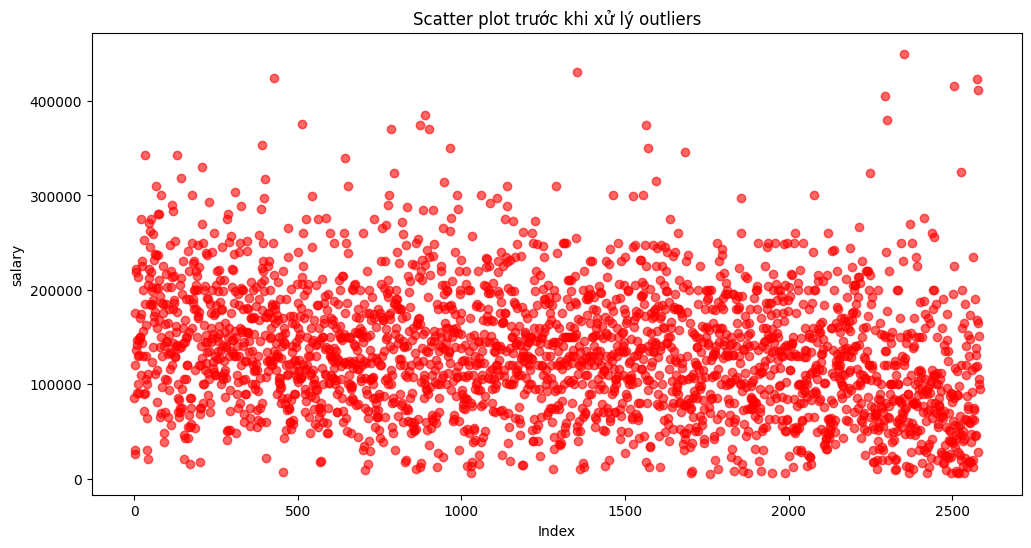

In [1480]:
# Vẽ scatter plot trước khi xử lý
plt.figure(figsize=(12, 6))
plt.scatter(range(len(data)), data['salary'], color='red', alpha=0.6)
plt.title('Scatter plot trước khi xử lý outliers')
plt.xlabel('Index')
plt.ylabel('salary')
plt.show()

In [1481]:
# Check outliers in salary
Q1 = data['salary'].quantile(0.25)
Q3 = data['salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
print('Total Upper Outlier',data[data["salary"]>upper_bound].shape)
print('Total Lower Outlier',data[data["salary"]<lower_bound].shape)


Lower bound: -50062.5, Upper bound: 310037.5
Total Upper Outlier (29, 9)
Total Lower Outlier (0, 9)


In [1482]:
data[data["salary"]>upper_bound]

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
33,2023,Senior,Full-time,Machine Learning Engineer,342810,North America,0,North America,Medium
133,2023,Senior,Full-time,Machine Learning Engineer,342300,North America,0,North America,Large
145,2023,Senior,Full-time,Machine Learning Engineer,318300,North America,100,North America,Medium
228,2023,Director,Full-time,Data Manager,329500,North America,0,North America,Medium
478,2023,Director,Full-time,Data Manager,353200,North America,0,North America,Medium
488,2023,Senior,Full-time,Data Scientist,317070,North America,0,North America,Medium
528,2023,Senior,Full-time,Machine Learning Engineer,423834,Asia,0,Asia,Large
649,2023,Senior,Full-time,Data Engineer,376080,North America,100,North America,Medium
845,2023,Intermediate,Full-time,Research Scientist,340000,North America,100,North America,Medium
1105,2023,Senior,Full-time,Data Scientist,370000,North America,0,North America,Medium


In [1483]:
# Remove outliers from the salary column
data = data[(data['salary'] >= lower_bound) & (data['salary'] <= upper_bound)]
print(f"Shape of dataset after removing outliers: {data.shape}")

Shape of dataset after removing outliers: (2555, 9)


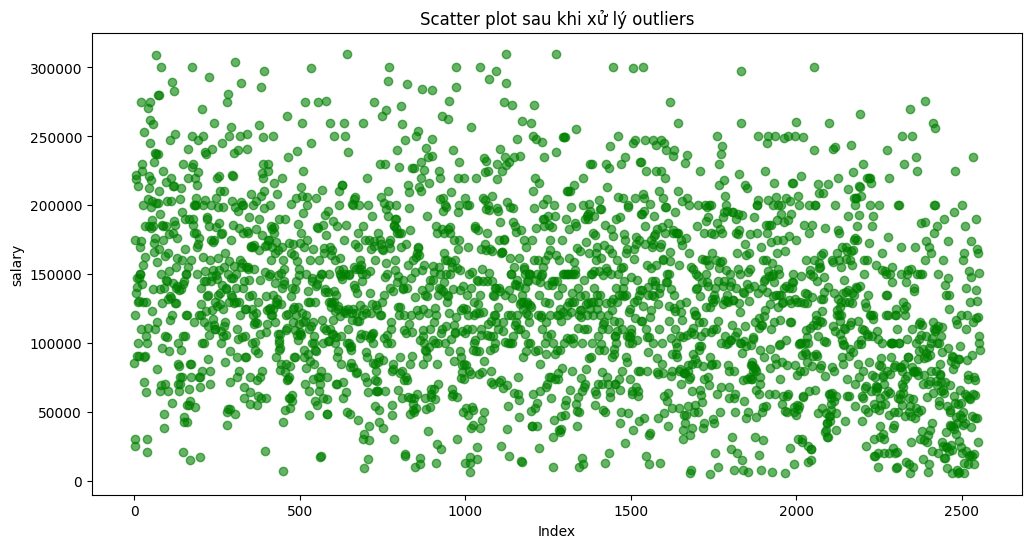

In [1484]:
plt.figure(figsize=(12, 6))
plt.scatter(range(len(data)), data['salary'], color='green', alpha=0.6)
plt.title('Scatter plot sau khi xử lý outliers')
plt.xlabel('Index')
plt.ylabel('salary')
plt.show()

In [1485]:
data['salary'].unique()

array([ 85847,  30000,  25500, ..., 119059,  28369,  94665], shape=(1009,))

In [1486]:
# work year
data['work_year'].value_counts()

work_year
2023    1141
2022    1116
2021     226
2020      72
Name: count, dtype: int64

In [1487]:
# remote ratio : 100-fully remote ; 50-Hybrid ; 0-fully onsite
data['remote_ratio'].value_counts()

remote_ratio
100    1199
0      1171
50      185
Name: count, dtype: int64

In [1488]:
# Transforming the remote ratio codes
# The remote ratio codes are: 100 = Fully Remote, 50 = Hybrid, 0 = Fully Onsite
# Convert remote_ratio to string type first
data['remote_ratio'] = data['remote_ratio'].astype(str)

# Now map the values
data.loc[:, 'remote_ratio'] = data['remote_ratio'].map({
    '100': 'remote',
    '0': 'onsite',
    '50': 'hybrid',
})

# Check the results
print(data['remote_ratio'].value_counts())
print(data['remote_ratio'].unique())

remote_ratio
remote    1199
onsite    1171
hybrid     185
Name: count, dtype: int64
['remote' 'onsite' 'hybrid']


In [1489]:
# columns_to_lower = ['experience_level', 'employment_type', 'job_title', 'company_size']
# for col in columns_to_lower:
#     data[col] = data[col].str.lower()

In [1490]:
# Statistics of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,2555.0,2022.301761,0.746262,2020.0,2022.0,2022.0,2023.0,2023.0
salary,2555.0,130781.807828,62656.443183,5132.0,84053.0,128875.0,174000.0,310000.0


In [1491]:
# Statistics of data for categorical data
data.describe(include="O")

,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
count,2555,2555,2555,2555,2555,2555,2555
unique,4,4,7,8,3,8,3
top,Senior,Full-time,Data Engineer,North America,remote,North America,Medium
freq,1535,2519,715,1967,1199,2005,2009


In [1492]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 150


In [1493]:
#Display the unique values of each column after transformation
for col in data.columns:
    print(f"{col}: {data[col].unique()}")

work_year: [2023 2022 2020 2021]
experience_level: ['Senior' 'Intermediate' 'Junior' 'Director']
employment_type: ['Full-time' 'Contract' 'Freelance' 'Part-time']
job_title: ['Data Scientist' 'Machine Learning Engineer' 'Research Scientist'
 'Data Analyst' 'Other' 'Data Engineer' 'Data Manager']
salary: [ 85847  30000  25500 ... 119059  28369  94665]
employee_residence: ['Europe' 'North America' 'Africa' 'Asia' 'Oceania' 'South America'
 'Other' 'Middle East']
remote_ratio: ['remote' 'onsite' 'hybrid']
company_location: ['Europe' 'North America' 'Africa' 'Asia' 'South America' 'Oceania'
 'Other' 'Middle East']
company_size: ['Large' 'Small' 'Medium']


In [1494]:
# Save the cleaned data
data.to_csv('cleaned_ds_salaries.csv', index=False)